In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_oop_raw = pd.read_excel(r'text.xlsx')

In [3]:
df_oop = df_oop_raw.copy()

In [4]:
df_oop_tsu  = df_oop[df_oop['oop_name'] == 'Бизнес-аналитика']

In [5]:
df_oop_tpu = df_oop[df_oop['oop_name'] == 'Бизнес-анализ и разработка информационных систем']

In [6]:
df_oop_tsu = df_oop_tsu.groupby(['disc','oop_name', 'speciality'])['cos_simularity'].agg(count= 'count', sum= 'sum')
df_oop_tpu = df_oop_tpu.groupby(['disc','oop_name', 'speciality'])['cos_simularity'].agg(count= 'count', sum= 'sum')

In [7]:
df_oop_tsu['cum_simularity'] = df_oop_tsu['sum'] / df_oop_tsu['count'] 
df_oop_tpu['cum_simularity'] = df_oop_tpu['sum'] / df_oop_tpu['count'] 

In [26]:
pivot_tsu = pd.pivot_table(
    df_oop_tsu, 
    values='cum_simularity', 
    index= ['oop_name', 'disc'],
    columns=['speciality'],
    #margins = True, margins_name='Всего'
)

In [27]:
pivot_tsu

speciality                                                           BI-аналитик, аналитик данных; Маркетолог-аналитик; Продуктовый аналитик; Финансовый аналитик, инвестиционный аналитик; Руководитель отдела аналитики  \
oop_name         disc                                                                                                                                                                                                       
Бизнес-аналитика Анализ данных в бизнес-аналитике                                                             0.243988                                                                                                      
                 Анализ заинтересованных сторон _* Stakeholder A...                                           0.126480                                                                                                      
                 Аналитика цепей поставок                                                                     0.313216                                                                                                      
                 Архитектура предприятия                                                                      0.221735                                                                                                      
                 Аудит                                                                                        0.184446                                                                                                      
...                                                                                                                ...                                                                                                      
                 Экономика отраслевых рынков                                                                  0.242447                                                                                                      
                 Экономическая социология                                                                     0.183990                                                                                                      
                 Экономическая статистика                                                                     0.297004                                                                                                      
                 Экономический анализ                                                                         0.332739                                                                                                      
                 Элективные дисциплины по физической культуре и ...                                           0.173866                                                                                                      

speciality                                                           Аналитик  \
oop_name         disc                                                           
Бизнес-аналитика Анализ данных в бизнес-аналитике                    0.234878   
                 Анализ заинтересованных сторон _* Stakeholder A...  0.133836   
                 Аналитика цепей поставок                            0.288044   
                 Архитектура предприятия                             0.291939   
                 Аудит                                               0.224817   
...                                                                       ...   
                 Экономика отраслевых рынков                         0.218389   
                 Экономическая социология                            0.157221   
                 Экономическая статистика                            0.277690   
                 Экономический анализ                                0.310273   
                 Элективные дисциплины по физической культуре и ...  0.151171   

speciality                                                           Биз

In [28]:
pivot_tpu = pd.pivot_table(
    df_oop_tpu, 
    values='cum_simularity', 
    index=['oop_name', 'disc'],
    columns=['speciality'],
    #margins = True, margins_name='Всего'
)

<Axes: xlabel='speciality', ylabel='oop_name-disc'>

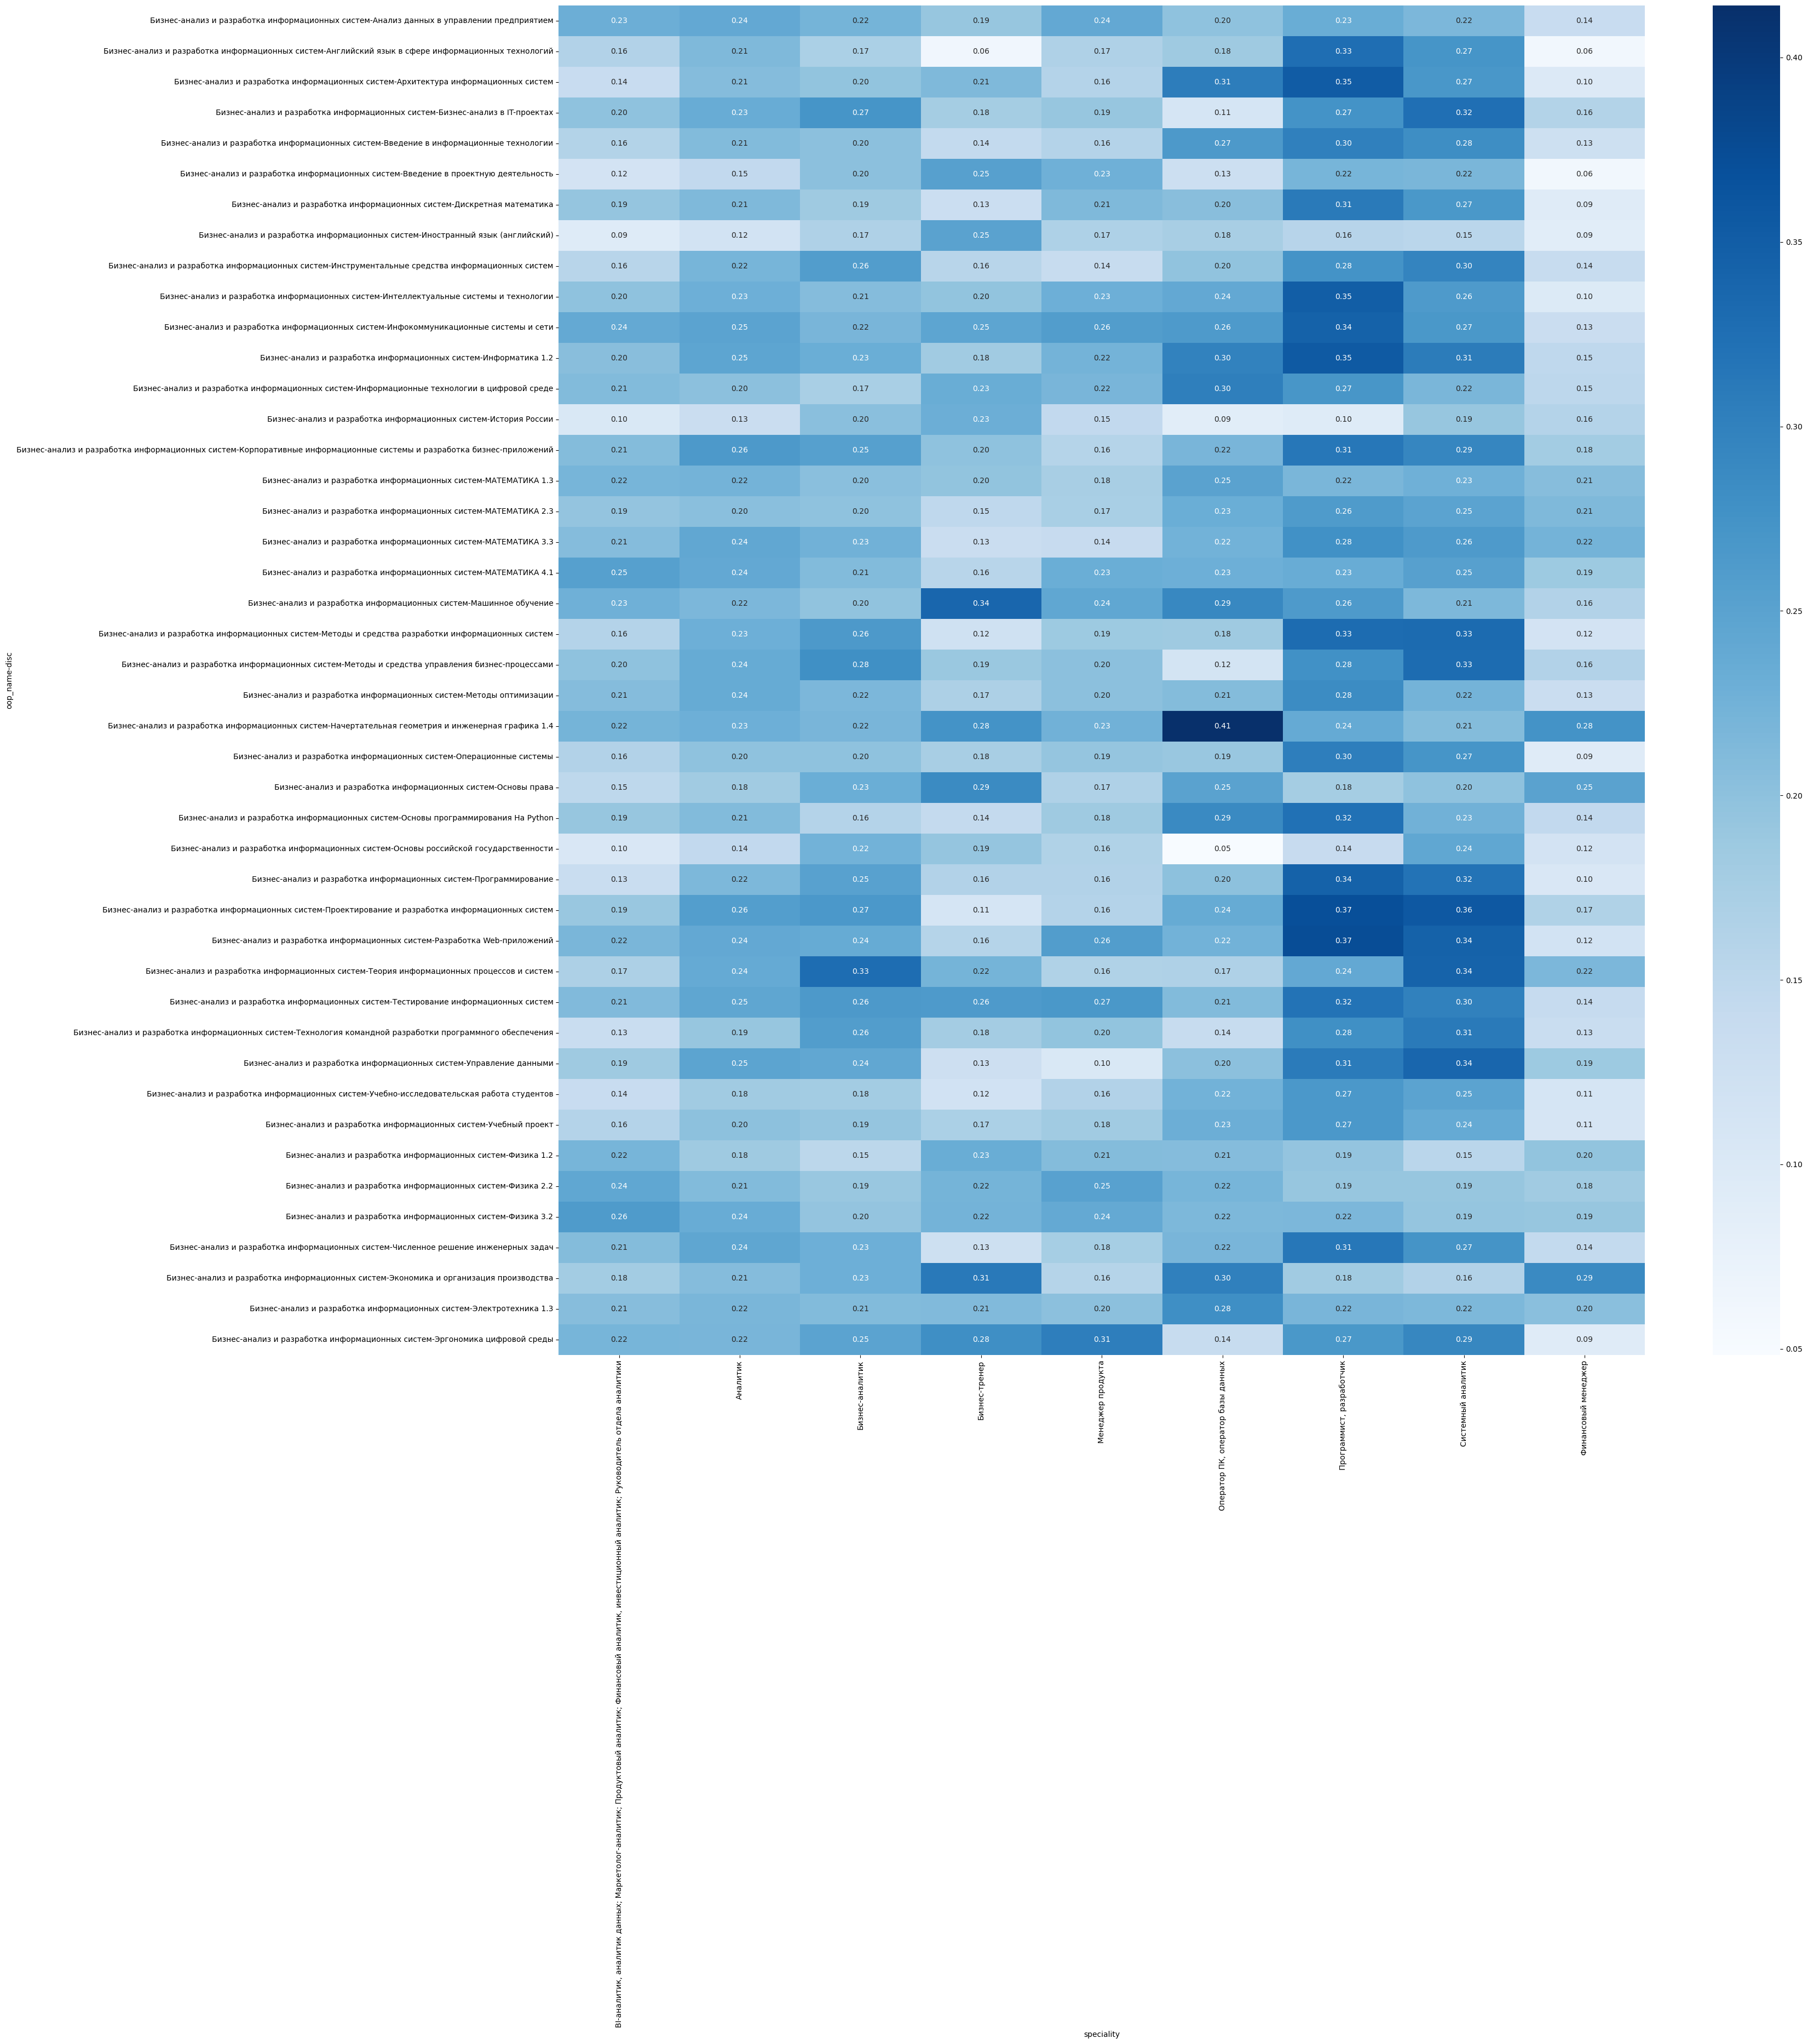

In [30]:
plt.figure(figsize = (32,32))
sns.heatmap(pivot_tpu, cmap="Blues", annot=True, fmt=".2f") 

<Axes: xlabel='speciality', ylabel='oop_name-disc'>

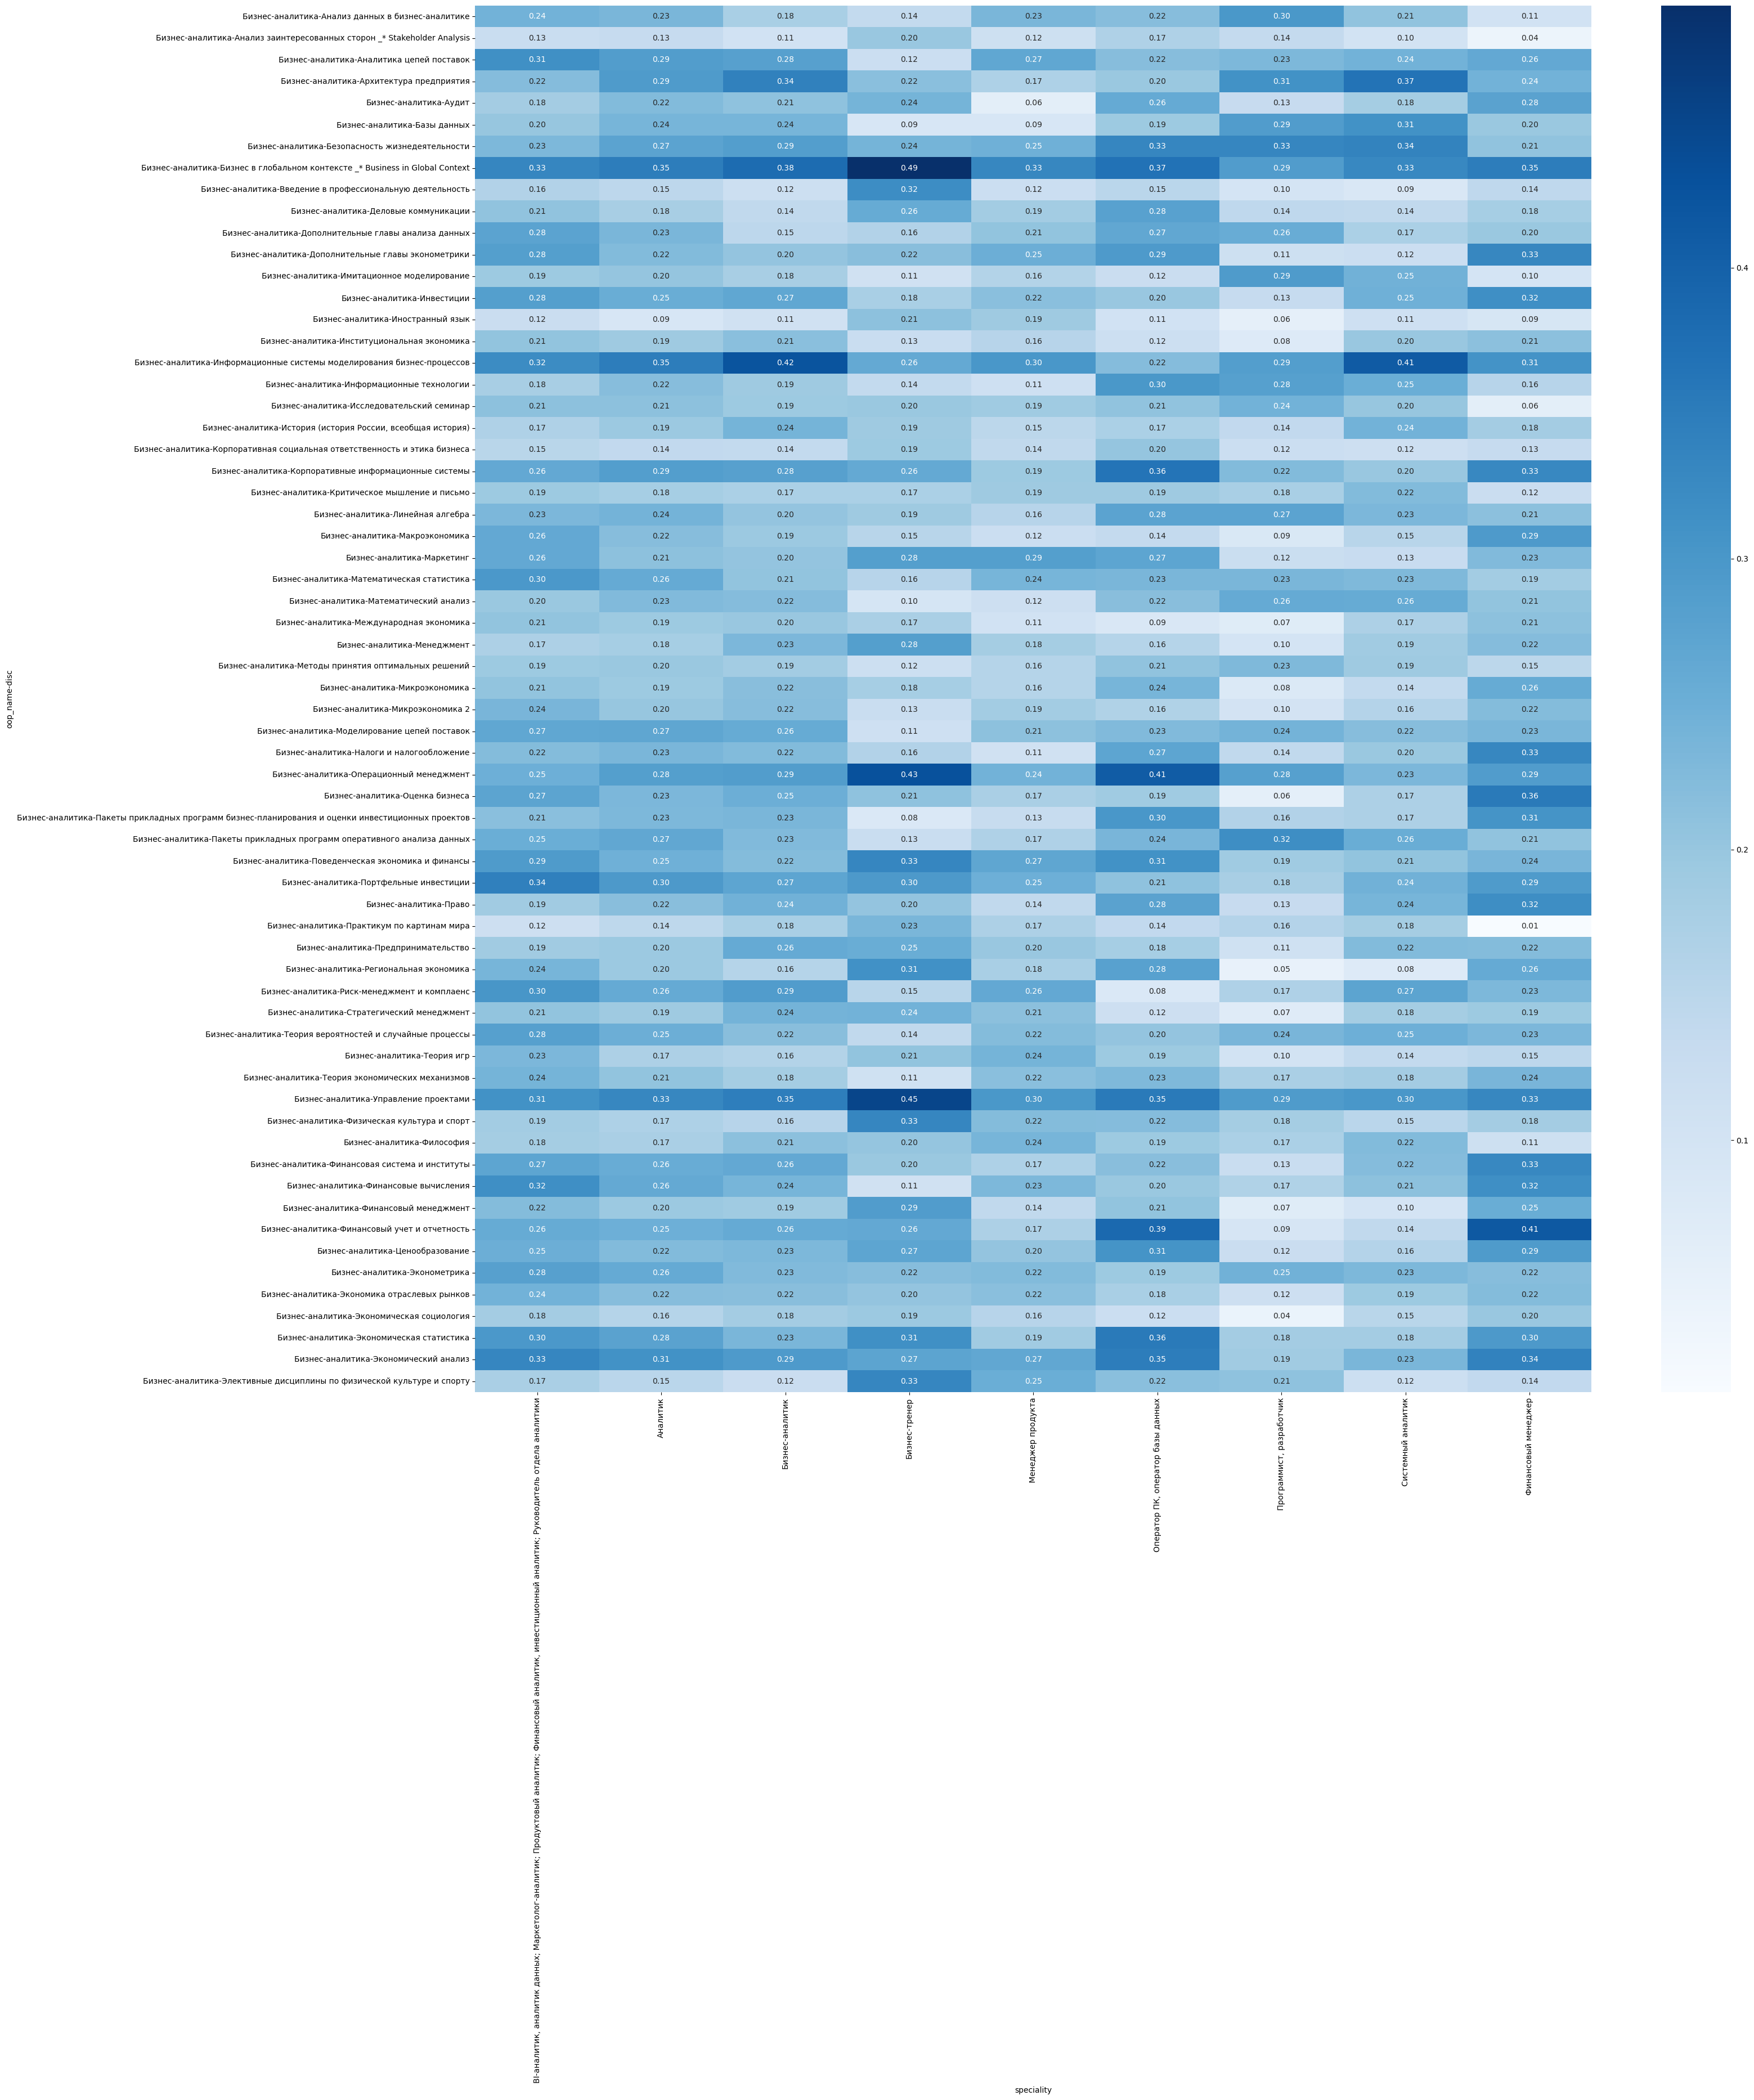

In [31]:
plt.figure(figsize = (32,32))
sns.heatmap(pivot_tsu, cmap="Blues", annot=True, fmt=".2f") 